![logo](img/logo.svg)

**Seaborn** je balíček nástrojů pro vizualizaci dat v Pythonu implementovaný nad Matplotlibem, operující nad sloupci v pandas. V této ukázce nebudeme zabíhat do technických detailů, ale ukážeme si, jak grafy v seaborn fungují a jak je modifikovat podle našich představ. 

Další informace hledejte zde:
- [Dokumentace](https://seaborn.pydata.org/index.html)
- [Tutoriály](https://seaborn.pydata.org/tutorial.html)
- [Example Gallery](https://seaborn.pydata.org/examples/index.html)
- [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html) 

_Pozn.: Tento tutoriál čerpá z výše zmíněných odkazů._

In [1]:
# Import seaborn
import seaborn as sns

Na pozadí používá seaborn k vykreslování grafů knihovnu matplotlib. Pro interaktivní práci se doporučuje používat rozhraní Jupyter/IPython v [režimu matplotlib](https://ipython.readthedocs.io/en/stable/interactive/plotting.html), jinak je nutné zavolat `matplotlib.pyplot.show()`, pokud budete chtít graf zobrazit.

Dále následuje nastavení motivu. Ten využívá matplotlib rcParam a ovlivňuje vzhled všech grafů matplotlib, i když je nevytváříte pomocí seabornu. Kromě výchozího motivu existuje několik dalších možností, pomocí kterých můžete nezávisle ovládat styl a měřítko grafu (více [zde](https://seaborn.pydata.org/tutorial/aesthetics.html)). Pokud se vám líbí výchozí nastavení matplotlibu nebo dáváte přednost jinému motivu, můžete tento krok přeskočit a i tak používat funkce pro vytváření grafů v seabornu.

In [2]:
# Apply the default theme
sns.set_theme()

Většina kódu v dokumentaci používá funkci `load_dataset()` pro jednoduchý přístup k ukázkovému datasetu. Tyto datasety nejsou nijak zvláštní: jsou to pouze pandas DataFrame, které jsme mohli načíst pomocí pandas.read_csv() nebo vytvořit ručně. Většina příkladů v dokumentaci specifikuje data pomocí pandas DataFrame, ale seaborn je velmi flexibilní, pokud jde o datové struktury, které akceptuje.

In [3]:
# Load an example dataset
tips = sns.load_dataset("tips")

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Graf níže znázorňuje vztah mezi pěti proměnnými v datasetu o dýškách pomocí jediného volání funkce seaborn `relplot()`. Všimněte si, že jsme zadali pouze názvy proměnných a jejich role v grafu. Na rozdíl od přímého použití matplotlib nebylo nutné specifikovat atributy prvků grafu z hlediska barevných hodnot nebo kódů značek. V pozadí seaborn zpracoval převod hodnot z DataFrame na argumenty, kterým matplotlib rozumí. Tento deklarativní přístup vám umožňuje soustředit se spíše na otázky, na které hledáte v grafech odpovědi, než na složité ovládání matplotlibu. _(to píší v tutoriálu, k používání seabornu vás nijak nenavádím 😀)_

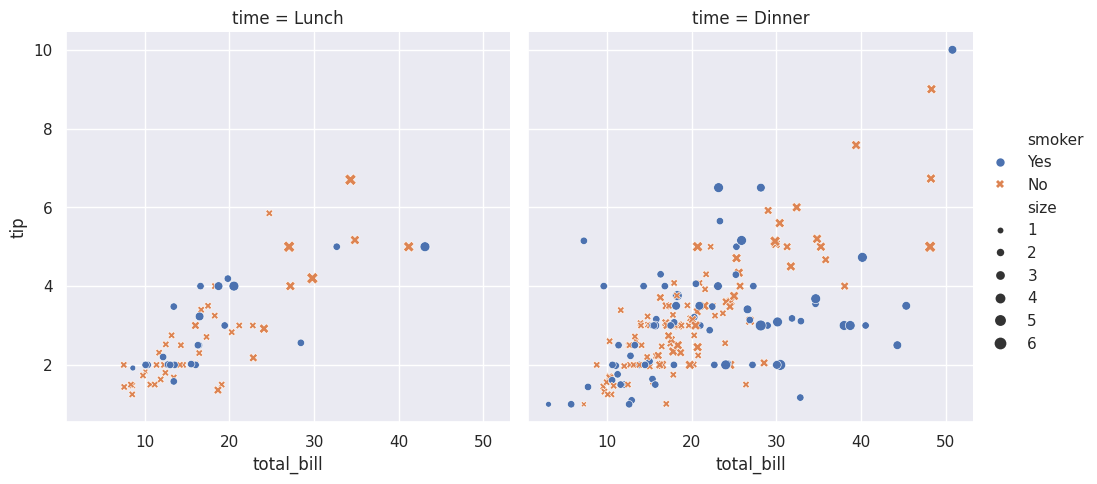

In [5]:
# Create a visualization
sns.relplot(
    data=tips,
    x="total_bill", y="tip", col="time",
    hue="smoker", style="smoker", size="size",
);

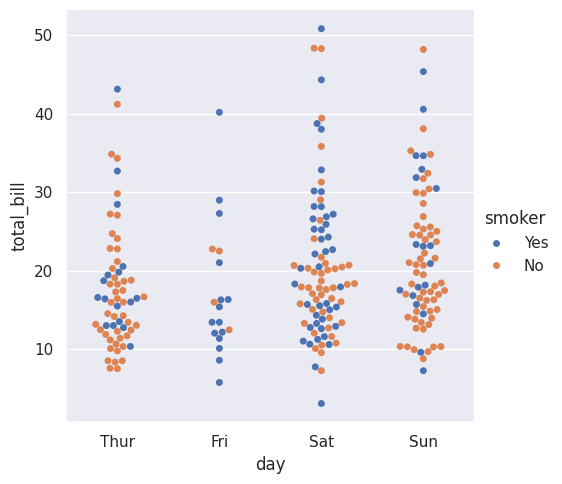

In [6]:
# Another type of visualization
sns.catplot(data=tips, kind="swarm", x="day", y="total_bill", hue="smoker");

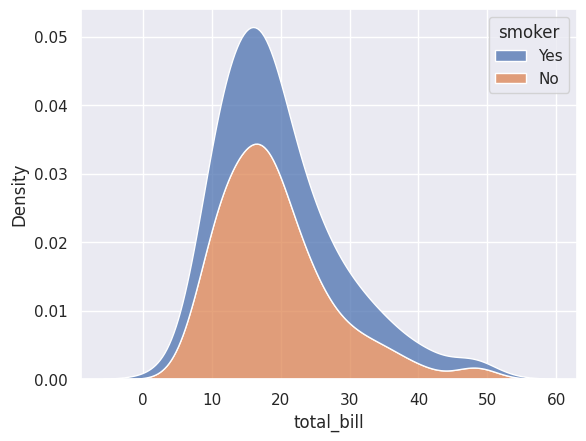

In [7]:
sns.kdeplot(data=tips, x="total_bill", hue="smoker", multiple="stack");

My se ale nebudeme zaobírat různými typy vizualizací v seaborn, inspirovat se můžete v bohaté "[Example Gallery](https://seaborn.pydata.org/examples/index.html)". Povíme si pouze letmo o organizaci jednotlivých funkcí a pustíme se do možností přizpůsobení.

## Podobné funkce pro podobné úkoly

Všechny funkce seaborn jsou přístupné na nejvyšší úrovni. Samotný kód je však hierarchicky strukturován, s moduly funkcí, které dosahují podobných vizualizačních cílů různými prostředky. Většina dokumentace se točí okolo modulů „relational“, „distributional“ a „categorical“.

Například modul `displot` ("distributional") definuje funkce, které se specializují na reprezentaci rozdělení datových bodů. To zahrnuje známé metody, jako je histogram, kde graf apod.

![seaborn](img/seaborn1.png)

Kromě rozdílných modulů můžeme narazit na dělení funkcí podle **axes-level** nebo **figure-level**. Poslední ukázka používá právě axes-level funkci, kdy jsou data vykreslena pomocí objektu `matplotlib.pyplot.Axes`, který vrací hodnotu dané funkce. Ukázky předcházející zase využívaly figure-level funkcí, které nabízejí jednotné prostředí pro dílčí axes-level funkce (dělení lze vidět na obrázku výše).

Histogram jste v seabornu schopni vykreslit buď právě pomocí funkce `displot()`, který defaultně používá stejné parametry jako `histplot()`, nebo můžete použít rovnou právě `histplot()`. Obdobný případ by to byl s `kdeplot()`, místo kterého lze použít `histplot()` s parametrem `kind="kde"`.

V matplotlibu jste viděli sestavování grafů pomocí `fig` a `ax`. Axes-level funkce vykreslují grafy automaticky do "aktivní" axes, spolu s legendou a popisem os. Můžeme ale využít argumentu `ax`, který interaguje s nám již známým OO rozhraním, a specifikocat tak, kde a jak budou naše grafy rozmístěny.

In [8]:
import matplotlib.pyplot as plt

penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


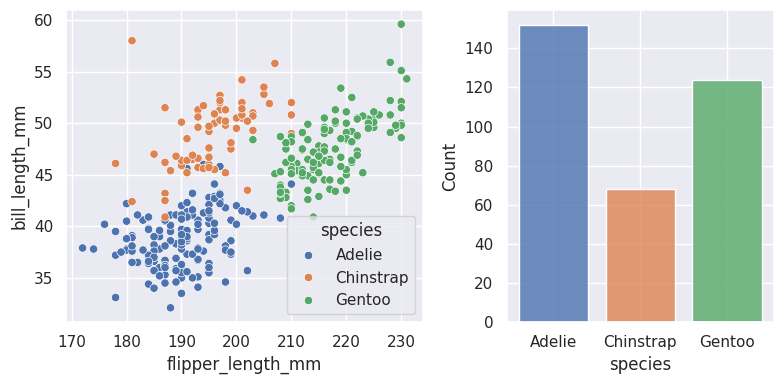

In [9]:
f, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 3]))
sns.scatterplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species", ax=axs[0])
sns.histplot(data=penguins, x="species", hue="species", shrink=.8, alpha=.8, legend=False, ax=axs[1])
f.tight_layout()

Oproti tomu figure-level funkce nemohou být jednoduše kombinovány, tzn. nelze vykreslovat více figure-level grafů do jedné axes. Můžete ale přistupovat k axes, kterou figure-level funkce vrátí, a k ní přidávat další prvky, např.:

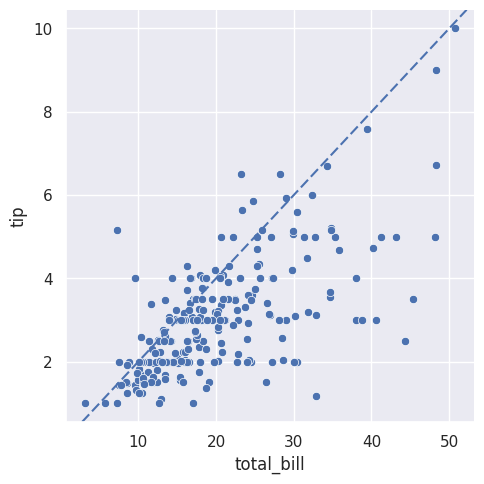

In [10]:
g = sns.relplot(data=tips, x="total_bill", y="tip")
g.ax.axline(xy1=(10, 2), slope=.2, color="b", dashes=(5, 2));

## Úprava velikosti grafu

Pro nastavení velikosti obrázku můžete využít známý parametr `figsize` z [`matplotlib.pyplot.subplots()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html#matplotlib.pyplot.subplots) nebo zavolat metodu `matplotlib.Figure.set_size_inches()`. 

Pokud používáte axes-level funkce, pak platí, že velikost grafu je daná velikostí Figure, které je součástí, a rozvržením Axes. U figure-level funkcí je velikost dána pomocí `FacetGrid` a je defaultně čtvercová, případně lze upravit parametrem `width = height * aspect` (nastavuje velikost jednotlivých podgrafů, než celkové Figure).

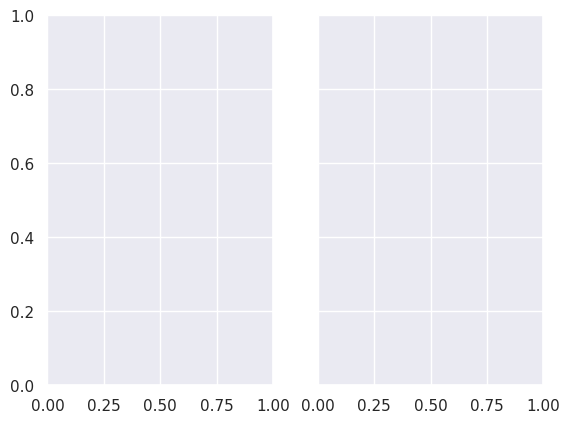

In [11]:
# axes-level
f, ax = plt.subplots(1, 2, sharey=True)

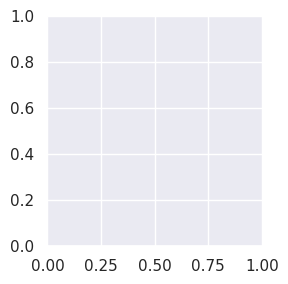

In [12]:
# figure-level
g = sns.FacetGrid(penguins)

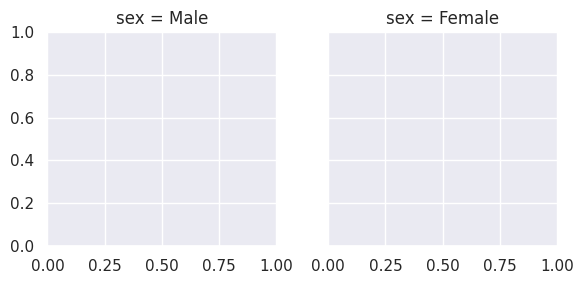

In [13]:
g = sns.FacetGrid(penguins, col="sex")

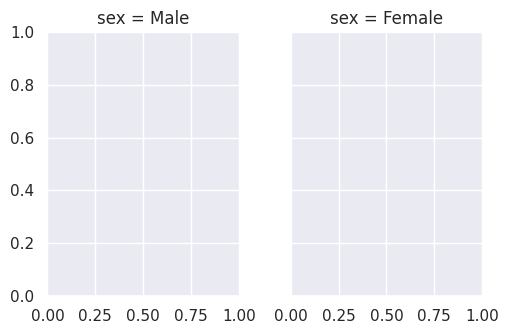

In [14]:
g = sns.FacetGrid(penguins, col="sex", height=3.5, aspect=.75)

## Seaborn a data

Je rozdíl, zda jsou vaše data reprezentována jako _wide_ nebo _long_ formát. Seaborn obecně potřebuje mít každou proměnnou jako vektor, resp. více vektorů organizovaných jako tabulku.

![wide-long](img/wide-long.png)

### Dlouhý formát

Jak jsme si už říkala v ukázce o pandas, při dlouhém formátu je každá proměnná reprezentována jedním sloupcem a každé pozorování představuje jeden řádek. V tomto formátu stačí daný sloupec přiřadit dané proměnné (x, y, hue).

In [15]:
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


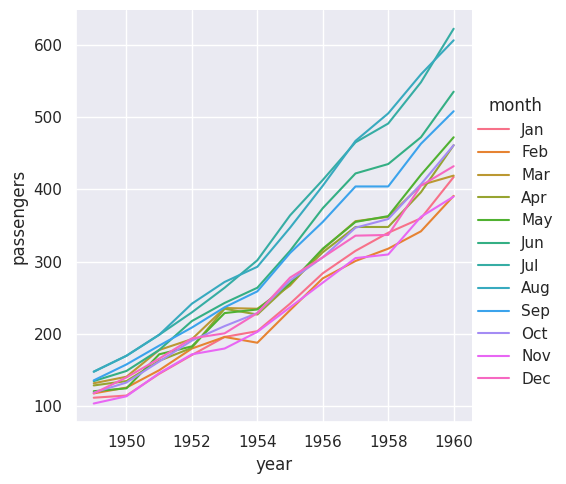

In [16]:
sns.relplot(data=flights, x="year", y="passengers", hue="month", kind="line");

### Široký formát

Široký formát může být často intuitivnější - data jsou reprezentována jako spreadsheet, kdy sloupce a řádky obsahují různé úrovně různých proměnných.

In [17]:
flights_wide = flights.pivot(index="year", columns="month", values="passengers")
flights_wide.head()

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201


U dlouhého formátu jsme schopni přistupovat k proměnné pomocí jejího jména. To u širokého nelze. Seaborn se s tím dokáže popasovat pomocí argumentu `data`:

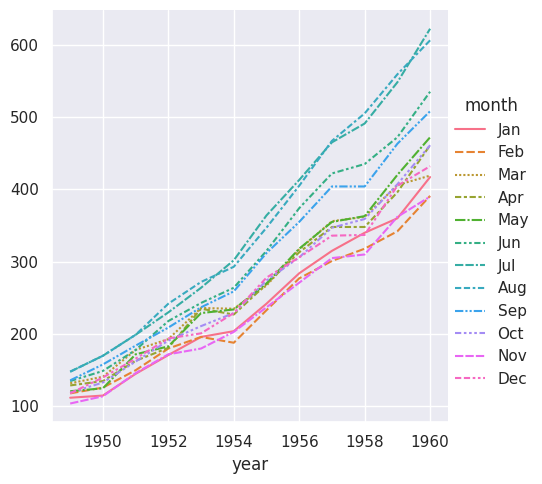

In [18]:
sns.relplot(data=flights_wide, kind="line");

☝️ Všimnete si nějakého rozdílu?

Přestože se může zdát, že jsme si u širokého fromátu ušetřili psaní, dlouhý formát vám usnadní přemýšlení nad strukturou vašich dat - jakmile data jednou převedete do tohoto formátu, můžete se už soustředit jen na to, jak jednotlivé proměnné vykreslit. Také je dlouhý formát považovaný za "tidy" a seaborn může mít problémy při zpracování multi-indexu - seaborn nemá přímou podporu pro objekty `xarray`, tyto objekty můžete převést na pandas DataFrame pomocí metody `to_pandas`.

📖 Více si můžete nastudovat [zde](https://seaborn.pydata.org/tutorial/data_structure.html).

## Tvorba grafu

Při tvorbě grafu se nemusíte omezovat pouze na jeden podgraf s jedním druhem značek - díky metodě `Plot`. Komplexnější grafika může být realizována pomocí `Plot.add()`, kterou lze používat opakovaně - pokaždé, když funkci zavoláte, vytvoří se další vrstva v grafu:

In [19]:
# seaborn objects interface
import seaborn.objects as so

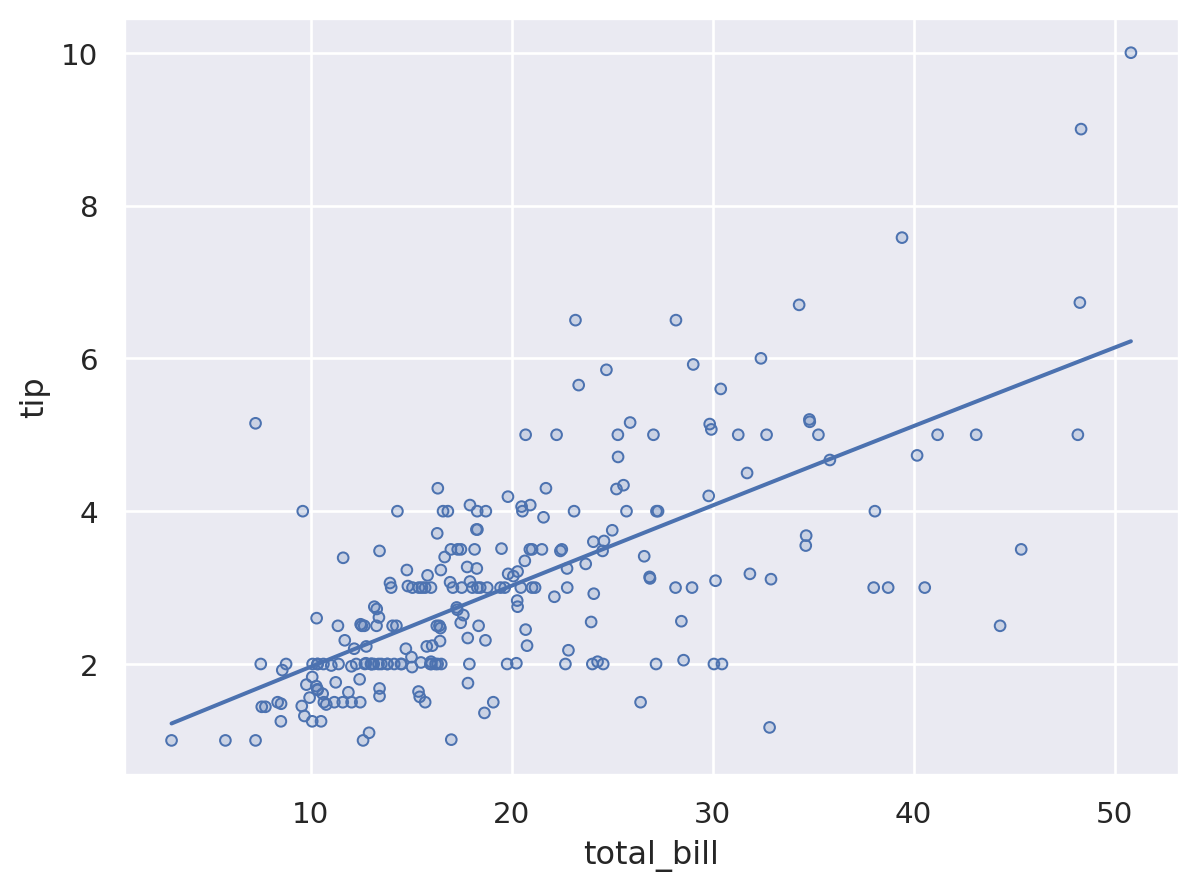

In [20]:
(
so.Plot(tips, x="total_bill", y="tip") # nejdříve specifikujeme data
    .add(so.Dots()) # a pak přidáváme prvky - scatter plot
    .add(so.Line(), so.PolyFit()) # regresní přímku
)

A každou vrstvu můžete samostatně pomocí parametrů nastavovat.

![markers](img/markers.svg)

U třídy `Dot` (`Dots`) je příkladem `Mark`, což je objekt, který graficky reprezentuje datové body. Každá značka má několik vlastností, které můžete nastavovat (např. `color`, `pointsize`). Mimo to je možné jednotlivé vlastnosti přiřadit přímo datům:

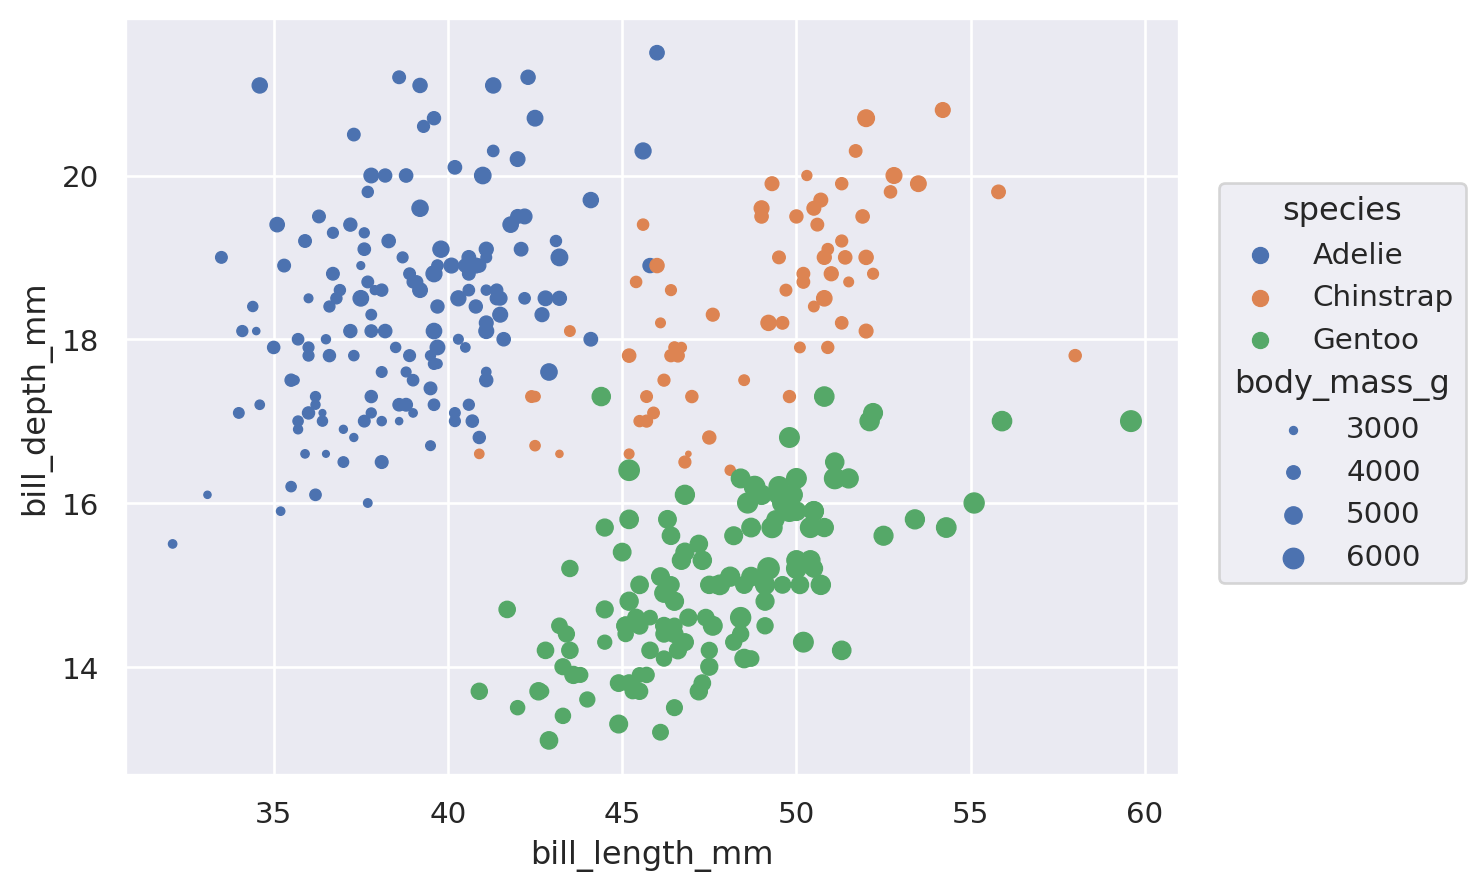

In [21]:
(
    so.Plot(
        penguins, x="bill_length_mm", y="bill_depth_mm",
        color="species", pointsize="body_mass_g",
    )
    .add(so.Dot())
)

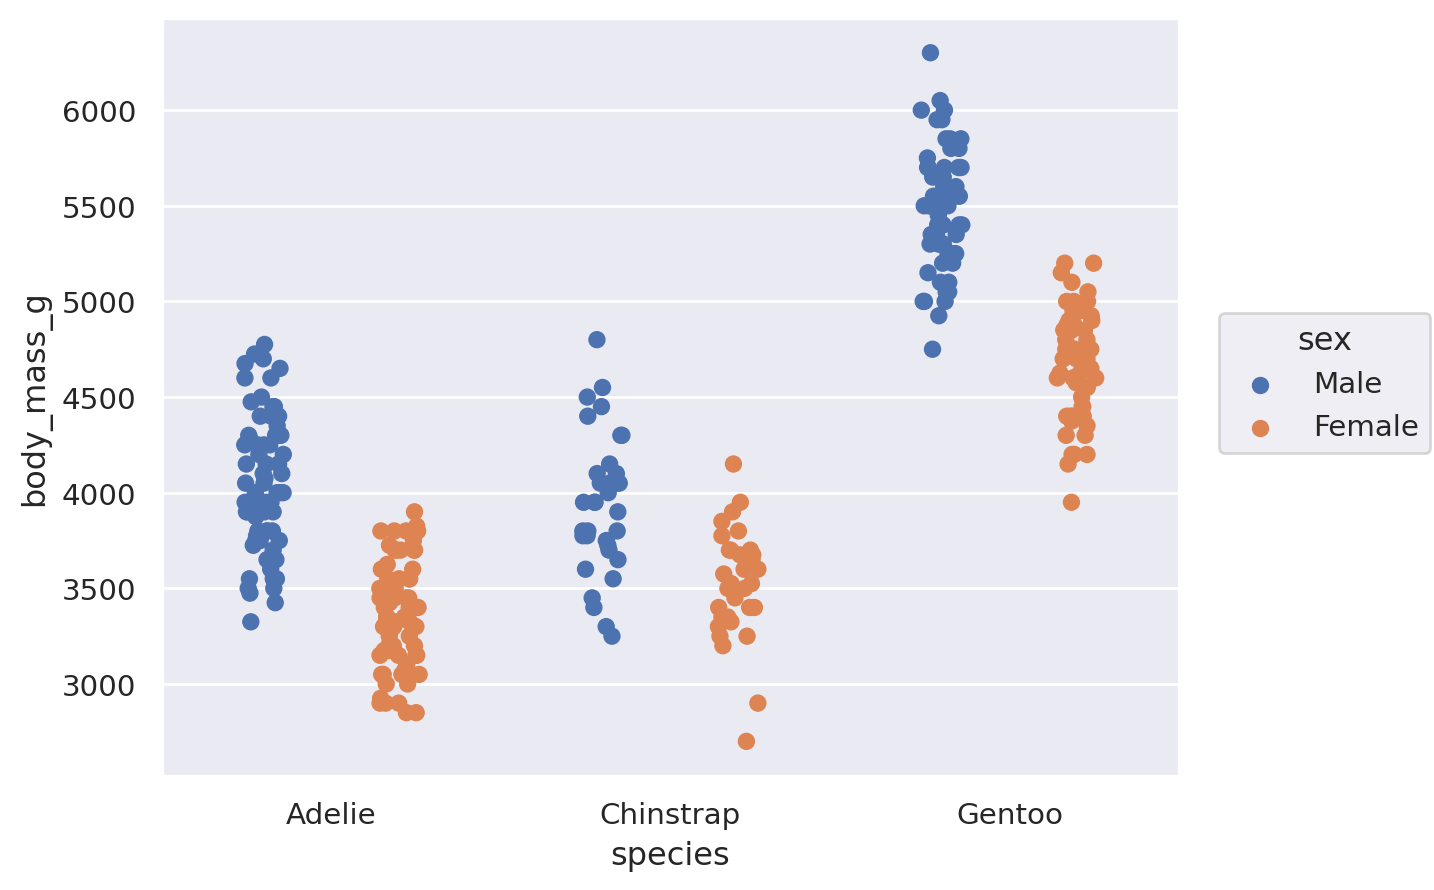

In [22]:
(
    so.Plot(penguins, x="species", y="body_mass_g", color="sex")
    .add(so.Dot(), so.Dodge(), so.Jitter(.3)) 
)

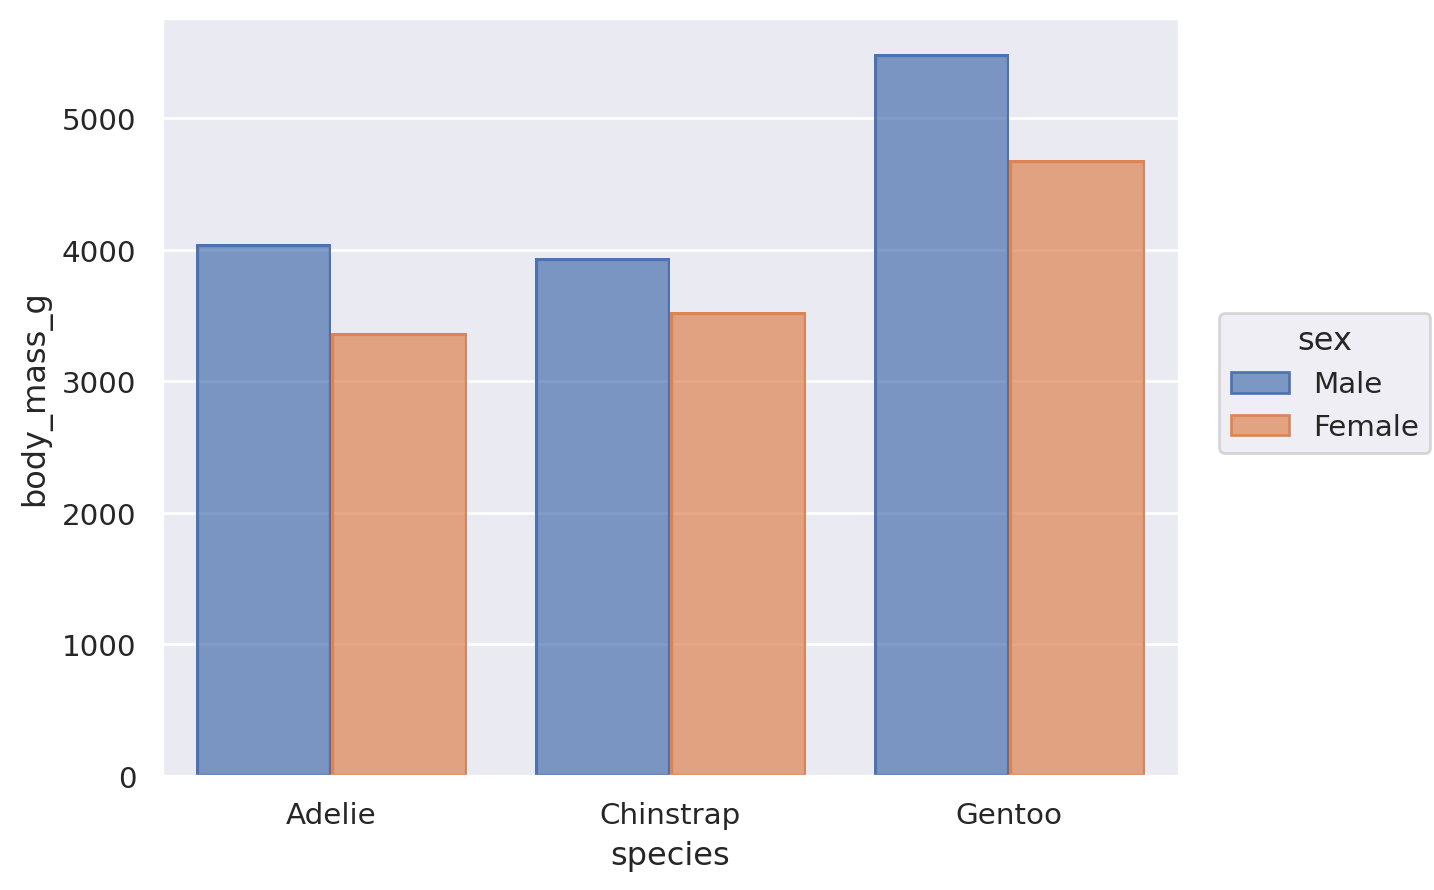

In [23]:
# podporuje i statistické transformace
(
    so.Plot(penguins, x="species", y="body_mass_g", color="sex")
    .add(so.Bar(), so.Agg(), so.Dodge()) # zároveň jedntlivé funkce můžete skládat
)

Pomocí `Plot.facet()` jste také schopni vytvořit několik podgrafů, např.:

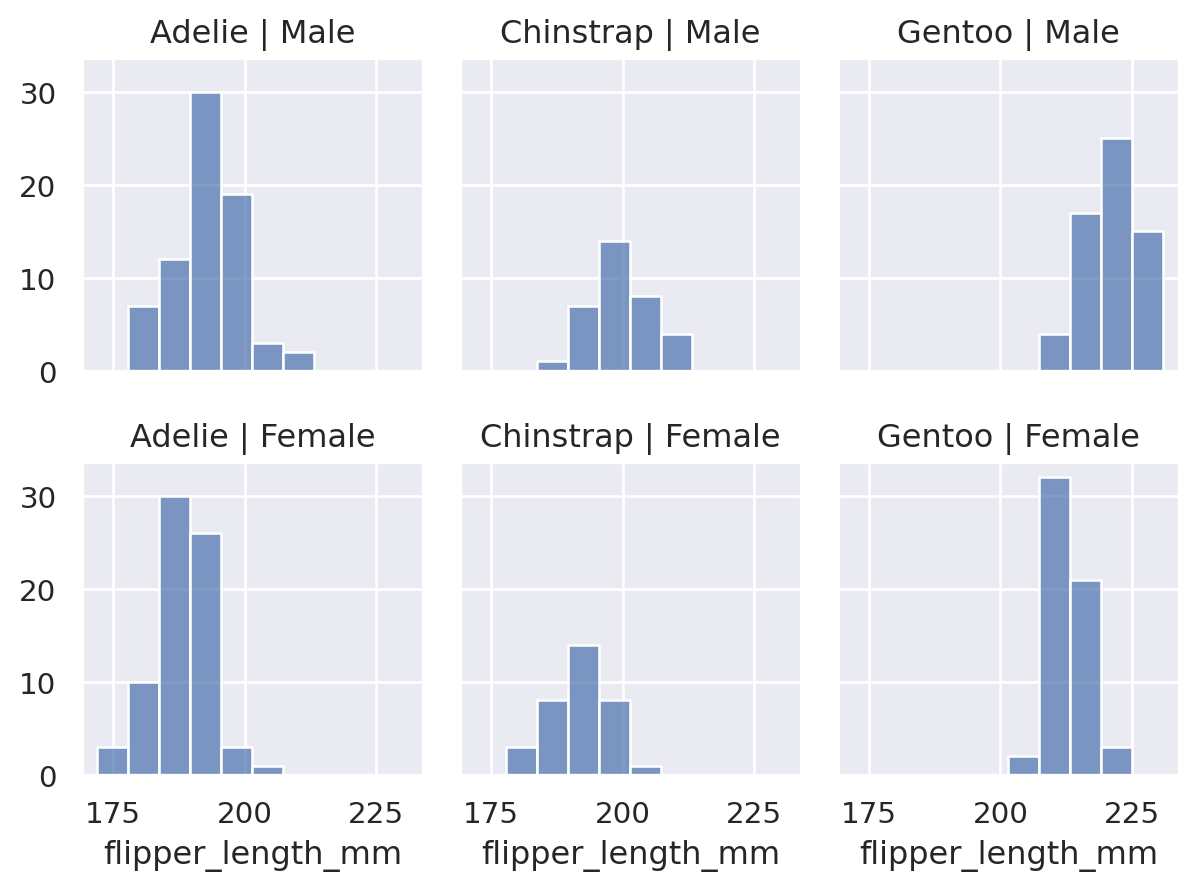

In [24]:
(
    so.Plot(penguins, x="flipper_length_mm")
    .facet(col="species", row="sex")
    .add(so.Bars(), so.Hist())
)

A pokud byste chtěli vytvořit více podgrafů v jednom Figure s komplexnější strukturou, lze využít matplotlibu (buď `axes.Axes`, `figure.Figure` nebo `figure.SubFigure`):

In [25]:
import matplotlib as mpl

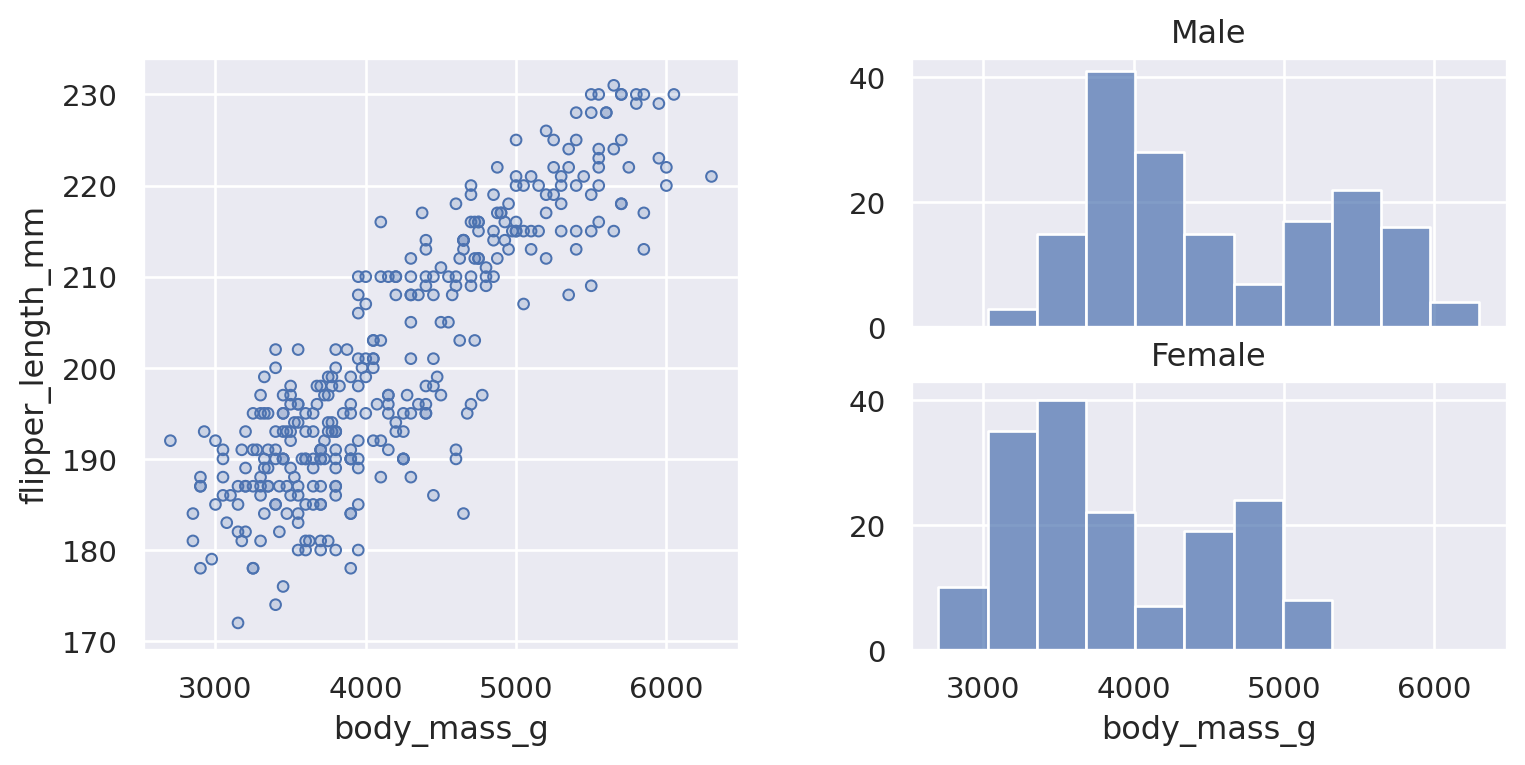

In [26]:
f = mpl.figure.Figure(figsize=(8, 4))
sf1, sf2 = f.subfigures(1, 2)
(
    so.Plot(penguins, x="body_mass_g", y="flipper_length_mm")
    .add(so.Dots())
    .on(sf1)
    .plot()
)
(
    so.Plot(penguins, x="body_mass_g")
    .facet(row="sex")
    .add(so.Bars(), so.Hist())
    .on(sf2)
    .plot()
)

📖 [zde](https://seaborn.pydata.org/tutorial/objects_interface.html#building-and-displaying-the-plot) zároveň najdete, jak nastavit různé škály, motiv, popisky os, nadpisy apod. Komplexnější ukázka:

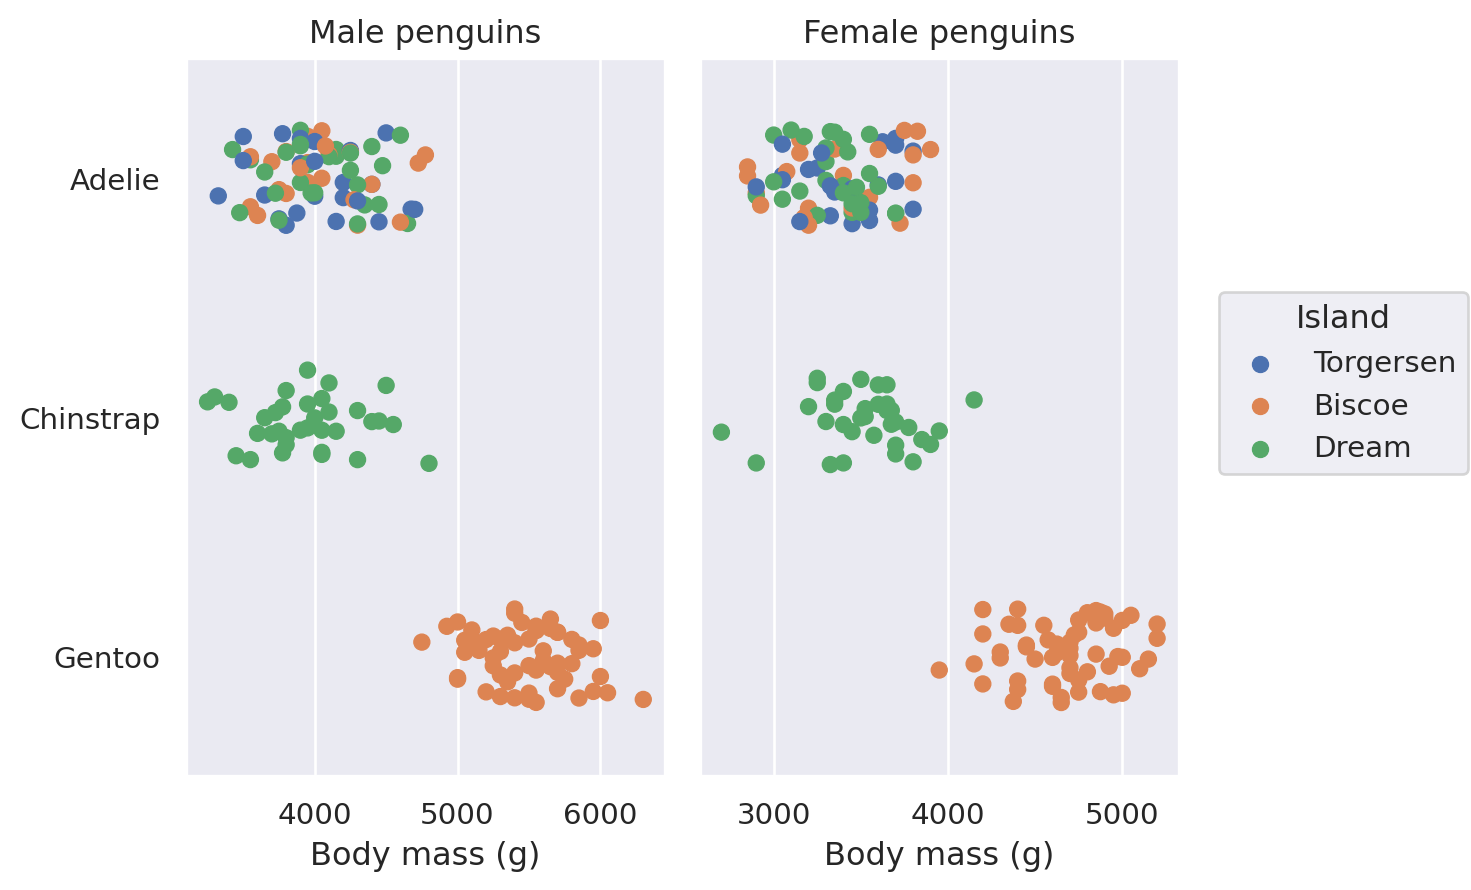

In [27]:
(
    so.Plot(penguins, x="body_mass_g", y="species", color="island")
    .facet(col="sex")
    .add(so.Dot(), so.Jitter(.5))
    .share(x=False)
    .limit(y=(2.5, -.5))
    .label(
        x="Body mass (g)", y="",
        color=str.capitalize,
        title="{} penguins".format,
    )
)

## Vlastnosti značek

Stejně jako tomu bylo u matplotlibu, i u seaborn grafů můžeme značkám (`Mark`) nastavovat několik vlastností:
- souřadnice: x (vertikálně), y (vertikálně) , xmin, xmax, ymin, ymax, škála
- barvy: color, fillcolor, edgecolor, scale, alpha, fillalpha, edgealpha,
- styl: fill, marker, linestyle, edgestyle,
- velikost: pointsize, linewidth, edgewidth, stroke,
- text: halign, valign, fontsize, offset,
a další.

Podrobnosti se dočtete [zde](https://seaborn.pydata.org/tutorial/properties.html). 📖

Dále si můžete pohrát s [barevnými paletami](https://seaborn.pydata.org/tutorial/color_palettes.html) a nebo s celkovým [stylem grafu](https://seaborn.pydata.org/tutorial/aesthetics.html) (`set_theme`, `set_style`).